In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,RandomizedSearchCV





In [3]:
os.getcwd()

'/workspaces/kaggleCompitition/research'

In [4]:
%cd ..

/workspaces/kaggleCompitition


In [5]:
df = pd.read_csv("data/train.csv")

In [6]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266593 entries, 0 to 266592
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         266593 non-null  int64  
 1   RhythmScore                266593 non-null  float64
 2   AudioLoudness              266593 non-null  float64
 3   VocalContent               266592 non-null  float64
 4   AcousticQuality            266592 non-null  float64
 5   InstrumentalScore          266592 non-null  float64
 6   LivePerformanceLikelihood  266592 non-null  float64
 7   MoodScore                  266592 non-null  float64
 8   TrackDurationMs            266592 non-null  float64
 9   Energy                     266592 non-null  float64
 10  BeatsPerMinute             266592 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 22.4 MB


In [8]:
df.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 1
AcousticQuality              1
InstrumentalScore            1
LivePerformanceLikelihood    1
MoodScore                    1
TrackDurationMs              1
Energy                       1
BeatsPerMinute               1
dtype: int64

In [9]:
df.shape

(266593, 11)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [13]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,266592.0,133295.500000,76958.625819,0.000000,66647.750000,133295.500000,199943.250000,266591.000000
RhythmScore,266592.0,0.632891,0.156965,0.202823,0.515747,0.634751,0.739177,0.975000
AudioLoudness,266592.0,-8.378861,4.614961,-27.403312,-11.547321,-8.254046,-4.912300,-1.357000
VocalContent,266592.0,0.074534,0.049978,0.023500,0.023500,0.066545,0.107408,0.256401
AcousticQuality,266592.0,0.262638,0.222976,0.000005,0.069298,0.242571,0.396659,0.995000
InstrumentalScore,266592.0,0.117666,0.132021,0.000001,0.000001,0.074023,0.204065,0.869258
LivePerformanceLikelihood,266592.0,0.178447,0.118085,0.024300,0.077665,0.166465,0.268908,0.584792
MoodScore,266592.0,0.555605,0.225304,0.025600,0.403826,0.564775,0.716354,0.978000
TrackDurationMs,266592.0,241924.733910,59359.728808,63973.000000,207501.649725,243691.331950,281873.457000,464723.228100
Energy,266592.0,0.500644,0.290051,0.000069,0.254800,0.511800,0.746000,1.000000


EDA


<Axes: xlabel='RhythmScore', ylabel='Count'>

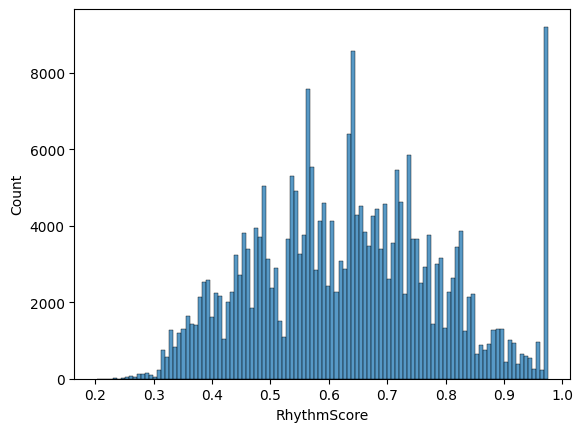

In [15]:
sns.histplot(df,x="RhythmScore") 

In [16]:
cols=df.columns.to_list()
cols.remove('id')

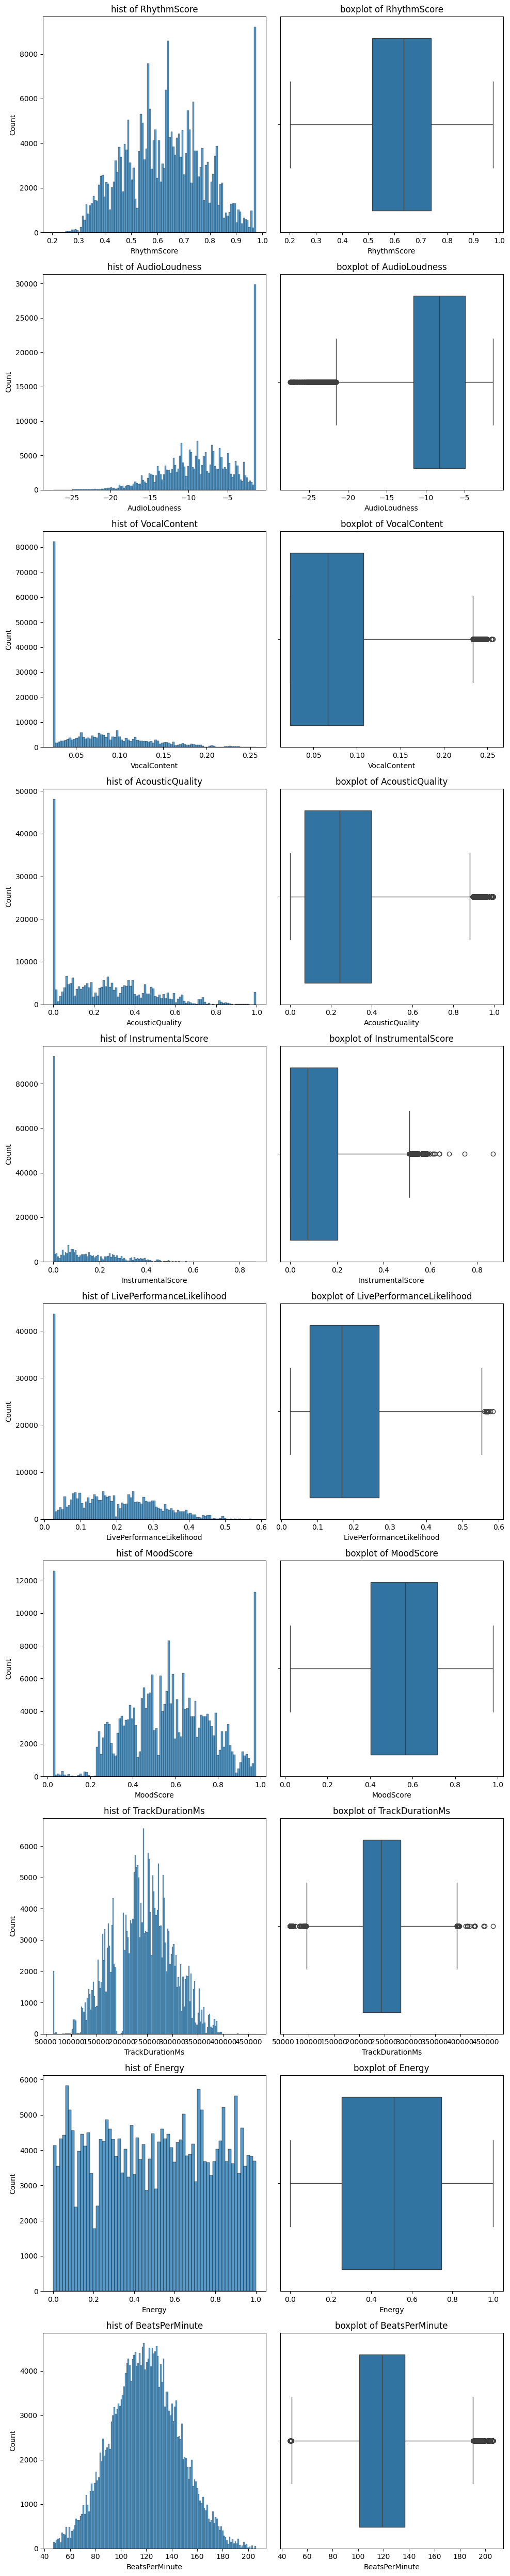

In [17]:
fig, axes = plt.subplots(10, 2, figsize=(10, 50))
for i,col in enumerate(cols):
    sns.histplot(df,x=col,ax=axes[i,0])
    axes[i,0].set_title(f'hist of {col}')
    
    sns.boxplot(df,x=col,ax=axes[i,1])
    axes[i,1].set_title(f'boxplot of {col}')
plt.tight_layout()





In [18]:
df=df[cols]

In [19]:
df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [20]:
X,y=df.iloc[:,:-1],df.iloc[:,-1]

In [21]:
X

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333
...,...,...,...,...,...,...,...,...,...
266587,0.936260,-12.479950,0.058346,0.365857,0.167960,0.247056,0.978000,186473.4222,0.128800
266588,0.975000,-1.357000,0.044791,0.070799,0.142339,0.184064,0.672346,286789.5663,0.408400
266589,0.975000,-5.232900,0.118012,0.270620,0.117898,0.024300,0.774498,241151.8141,0.639667
266590,0.635890,-14.168434,0.041369,0.000005,0.000001,0.297514,0.543706,245955.9116,0.620867


In [22]:
y

0         147.53020
1         136.15963
2          55.31989
3         147.91212
4          89.58511
            ...    
266587    149.97927
266588    105.25901
266589     93.23030
266590    145.01287
266591    114.24584
Name: BeatsPerMinute, Length: 266592, dtype: float64

In [23]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((213273, 9), (53319, 9), (213273,), (53319,))

In [25]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [26]:
from xgboost import XGBRegressor

In [27]:
xgr = XGBRegressor(
    n_estimators=1000,     # عدد الأشجار (نخليه كبير باش early stopping يوقف قبل ما يكثر)
    learning_rate=0.01,    # معدل التعلم
    max_depth=7,
    random_state=42,
    eval_metric="rmse",     # مقياس التقييم (مثلاً rmse, mae)
    early_stopping_rounds=20
)

In [28]:
xgr.fit(
    X_train, y_train,
    eval_set=[ (X_val, y_val)],  # نعطيه train و validation# يوقف إذا ماكانش تحسن 20 مرة متتالية
    verbose=True             # باش يطبعلك التطور في كل جولة

)

[0]	validation_0-rmse:26.46366
[1]	validation_0-rmse:26.46347
[2]	validation_0-rmse:26.46331
[3]	validation_0-rmse:26.46298
[4]	validation_0-rmse:26.46268
[5]	validation_0-rmse:26.46242
[6]	validation_0-rmse:26.46216
[7]	validation_0-rmse:26.46194
[8]	validation_0-rmse:26.46169
[9]	validation_0-rmse:26.46147
[10]	validation_0-rmse:26.46127
[11]	validation_0-rmse:26.46115
[12]	validation_0-rmse:26.46098
[13]	validation_0-rmse:26.46093
[14]	validation_0-rmse:26.46081
[15]	validation_0-rmse:26.46075
[16]	validation_0-rmse:26.46075
[17]	validation_0-rmse:26.46055
[18]	validation_0-rmse:26.46058
[19]	validation_0-rmse:26.46052
[20]	validation_0-rmse:26.46052
[21]	validation_0-rmse:26.46051
[22]	validation_0-rmse:26.46046
[23]	validation_0-rmse:26.46046
[24]	validation_0-rmse:26.46037
[25]	validation_0-rmse:26.46036
[26]	validation_0-rmse:26.46032
[27]	validation_0-rmse:26.46023
[28]	validation_0-rmse:26.46018
[29]	validation_0-rmse:26.46009
[30]	validation_0-rmse:26.46004
[31]	validation_0-

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,'rmse'


In [29]:
xgr.score(X_val,y_val)

0.00037338272362308356

In [30]:
xgr.best_score


26.458692737218346

In [31]:
param_dist = {
    "learning_rate": np.linspace(0.01, 0.3, 30),      # معدل التعلم
    "max_depth": np.arange(3, 15),                   # عمق الشجرة
    "min_child_weight": np.arange(1, 10),            # الوزن الأدنى للفرع
    "subsample": np.linspace(0.5, 1, 6),             # نسبة العينات
    "colsample_bytree": np.linspace(0.5, 1, 6),      # نسبة الأعمدة للشجرة
    "gamma": np.linspace(0, 5, 20),                  # min_split_loss
    "reg_alpha": [0, 0.01, 0.1, 1, 10],              # L1 regularization
    "reg_lambda": [0.1, 1, 10, 50, 100]              # L2 regularization
}

In [33]:
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(eval_metric="rmse",early_stopping_rounds=20,),
    param_distributions=param_dist,
    n_iter=50,                # عدد التجارب العشوائية
    scoring="neg_root_mean_squared_error",  # metric للتقييم
    cv=3,                     # cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# التدريب
random_search.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, gamma=4.2105263157894735, learning_rate=0.23999999999999996, max_depth=7, min_child_weight=7, reg_alpha=10, reg_lambda=10, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=4.2105263157894735, learning_rate=0.23999999999999996, max_depth=7, min_child_weight=7, reg_alpha=10, reg_lambda=10, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=4.2105263157894735, learning_rate=0.23999999999999996, max_depth=7, min_child_weight=7, reg_alpha=10, reg_lambda=10, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.5263157894736842, learning_rate=0.049999999999999996, max_depth=11, min_child_weight=9, reg_alpha=1, reg_lambda=50, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.5263157894736842, learning_rate=0.049999999999999996, max_depth=11, min_child_weight=9, reg_alpha=1, reg_lambda=50, subsample=0.7; total time=   2

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': array([0.5, 0....8, 0.9, 1. ]), 'gamma': array([0. ..., 5. ]), 'learning_rate': array([0.01, ..., 0.29, 0.3 ]), 'max_depth': array([ 3, 4..., 12, 13, 14]), ...}"
,n_iter,50
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [34]:
xgbr_best= random_search.best_estimator_

In [35]:
random_search.best_score_

np.float64(-26.508554133335604)

In [38]:
xgbr_best.score(X,y)

-5.314723606653082e-05

In [48]:
samp=pd.read_csv('data/sample_submission.csv')

In [49]:
samp

,id,BeatsPerMinute
0,524164,119.035
1,524165,119.035
2,524166,119.035
3,524167,119.035
4,524168,119.035
...,...,...
174717,698881,119.035
174718,698882,119.035
174719,698883,119.035
174720,698884,119.035


In [40]:
test=pd.read_csv('data/test.csv')

In [46]:
test.drop('id',axis=1,inplace=True)

In [47]:
test=scaler.transform(
    test
)

In [51]:
samp['BeatsPerMinute']=xgbr_best.predict(test)

In [52]:
samp.to_csv('data/samp.csv',index=False)